
## In this exercise, we will use the HR dataset and understand the following:

> 1. Building the Decision Tree model
2. Intrepret the decision tree business rules
3. Validate the outcome of the model on test set
4. Report precision, recall, F-score on test set


**Some advantages of decision trees are:**

> 1. Simple to understand and to interpret. Trees can be visualised.
2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that the sklearn decision tree module does not support missing values.
3. Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
4. Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic.


**The disadvantages of decision trees include:**

> 1. Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
2. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
3. Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

***

# Code starts here

To know the environment with the python kernal



In [1]:
import sys, os

sys.executable

'C:\\Users\\Administrator\\Anaconda3\\python.exe'

We are going to use below mentioned libraries for **data import, processing and visulization**. As we progress, we will use other specific libraries for model building and evaluation. 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt
import graphviz 

#the output of plotting commands is displayed inline within frontends like in Jupyter notebook
%matplotlib inline 

ModuleNotFoundError: No module named 'graphviz'


## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_



modify the ast_note_interactivity kernel option to see the value of multiple statements at once.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#raw.data <- read.csv("/Users/Rahul/Documents/Datasets/IMB533_HR_Data_No_Missing_Value.csv", 
#                     header = TRUE,sep = ",",na.strings = c(""," ", "NA"))


raw_df = pd.read_csv( "/Users/Rahul/Documents/Datasets/IMB533_HR_Data_No_Missing_Value.csv", 
                        sep = ',', na_values = ['', ' '])

raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.head()

,slno,candidate_ref,doj_extended,duration_to_accept_offer,notice_period,offered_band,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,lob,location,age,status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [5]:
#?pd.read_csv

Dropping SLNo and Candidate.Ref as these will not be used for any analysis or model building. To know about all the possible operations which can be performed on pandas dataframe: 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [6]:
#?raw_df.drop()

In [7]:
if set(['slno','candidate_ref']).issubset(raw_df.columns):
    raw_df.drop(['slno','candidate_ref'],axis=1, inplace=True)
    
raw_df.head()

,doj_extended,duration_to_accept_offer,notice_period,offered_band,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,lob,location,age,status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined



### 2. Structure of the dataset



In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 16 columns):
doj_extended                   8995 non-null object
duration_to_accept_offer       8995 non-null int64
notice_period                  8995 non-null int64
offered_band                   8995 non-null object
pecent_hike_expected_in_ctc    8995 non-null float64
percent_hike_offered_in_ctc    8995 non-null float64
percent_difference_ctc         8995 non-null float64
joining_bonus                  8995 non-null object
candidate_relocate_actual      8995 non-null object
gender                         8995 non-null object
candidate_source               8995 non-null object
rex_in_yrs                     8995 non-null int64
lob                            8995 non-null object
location                       8995 non-null object
age                            8995 non-null int64
status                         8995 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 1.1+ MB


In [9]:
raw_df.status.value_counts()
raw_df.describe(include='all').transpose()

Joined        7313
Not Joined    1682
Name: status, dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
doj_extended,8995,2,No,4788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_to_accept_offer,8995,NaN,NaN,NaN,21.4345,25.8116,0,3,10,33,224
notice_period,8995,NaN,NaN,NaN,39.2918,22.2202,0,30,30,60,120
offered_band,8995,4,E1,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pecent_hike_expected_in_ctc,8995,NaN,NaN,NaN,43.8648,29.789,-68.83,27.27,40,53.85,359.77
percent_hike_offered_in_ctc,8995,NaN,NaN,NaN,40.6574,36.0641,-60.53,22.09,36,50,471.43
percent_difference_ctc,8995,NaN,NaN,NaN,-1.5738,19.6107,-67.27,-8.33,0,0,300
joining_bonus,8995,2,No,8578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
candidate_relocate_actual,8995,2,No,7705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,8995,2,Male,7444,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To get a help on the features of a object

In [10]:
#?raw_df.status.value_counts()

### 2. Summarizing the dataset
Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed. The *dropna()* function is used for row wise deletion of missing value. The axis = 0 means row-wise, 1 means column wise.


In [11]:
filter_df = raw_df.dropna(axis=0, how='any', thresh=None, 
                             subset=None, inplace=False)

list(filter_df.columns )

['doj_extended',
 'duration_to_accept_offer',
 'notice_period',
 'offered_band',
 'pecent_hike_expected_in_ctc',
 'percent_hike_offered_in_ctc',
 'percent_difference_ctc',
 'joining_bonus',
 'candidate_relocate_actual',
 'gender',
 'candidate_source',
 'rex_in_yrs',
 'lob',
 'location',
 'age',
 'status']

In [12]:
#?raw_df.dropna

We will first start by printing the unique labels in categorical features

In [13]:
numerical_features = ['duration_to_accept_offer','notice_period','pecent_hike_expected_in_ctc',
                      'percent_hike_offered_in_ctc','percent_difference_ctc','rex_in_yrs','age']

categorical_features = ['doj_extended','offered_band','joining_bonus','candidate_relocate_actual',
                        'gender','candidate_source','lob','location','status']

for f in categorical_features:
    print("\nThe unique labels in {} is {}\n".format(f, filter_df[f].unique()))
    print("The values in {} is \n{}\n".format(f,  filter_df[f].value_counts()))



The unique labels in doj_extended is ['Yes' 'No']

The values in doj_extended is 
No     4788
Yes    4207
Name: doj_extended, dtype: int64


The unique labels in offered_band is ['E2' 'E1' 'E3' 'E0']

The values in offered_band is 
E1    5568
E2    2711
E3     505
E0     211
Name: offered_band, dtype: int64


The unique labels in joining_bonus is ['No' 'Yes']

The values in joining_bonus is 
No     8578
Yes     417
Name: joining_bonus, dtype: int64


The unique labels in candidate_relocate_actual is ['No' 'Yes']

The values in candidate_relocate_actual is 
No     7705
Yes    1290
Name: candidate_relocate_actual, dtype: int64


The unique labels in gender is ['Female' 'Male']

The values in gender is 
Male      7444
Female    1551
Name: gender, dtype: int64


The unique labels in candidate_source is ['Agency' 'Employee Referral' 'Direct']

The values in candidate_source is 
Direct               4801
Agency               2585
Employee Referral    1609
Name: candidate_source, dtype: int6

Looking at the feature **line of business** it seems that *EAS, Healthcare and MMS* does not have enough observations and may be clubbed together

In [14]:
filter_df['lob']=np.where(filter_df['lob'] =='EAS', 'Others', filter_df['lob'])
filter_df['lob']=np.where(filter_df['lob'] =='Healthcare', 'Others', filter_df['lob'])
filter_df['lob']=np.where(filter_df['lob'] =='MMS', 'Others', filter_df['lob'])
filter_df.lob.value_counts()

INFRA     2850
ERS       2426
BFSI      1396
ETS        691
CSMP       579
AXON       568
Others     485
Name: lob, dtype: int64

We will use **groupby** function of pandas to get deeper insights of the behaviour of people **Joining** or **Not Joining** the company. We will write a generic function to report the mean by any categorical variable.

In [15]:
def group_by (categorical_features):
    return filter_df.groupby(categorical_features).mean()



In [16]:
group_by("doj_extended")
group_by("status")

,duration_to_accept_offer,notice_period,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,rex_in_yrs,age
doj_extended,,,,,,,
No,13.171261,36.381579,43.907550,40.923223,-1.443452,4.011696,29.699248
Yes,30.838840,42.603993,43.816154,40.354773,-1.722154,4.497742,30.156644


,duration_to_accept_offer,notice_period,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,rex_in_yrs,age
status,,,,,,,
Joined,20.624368,37.244633,43.860660,41.133205,-1.262036,4.192944,30.004102
Not Joined,24.956599,48.192628,43.882818,38.588460,-2.929298,4.439358,29.517836


### 3. Visualizing the Data

Plot can be done using the 
> pandas methods
> matplotlib
> seaborn

In [17]:
def hist_plot(data, group_by, xlabel,ylabel):
    pd.crosstab(data,group_by).plot(kind='density')
    plt.xlabel(xlabel, size = 14)
    plt.ylabel(ylabel, size = 14)
    plt.title('Plot', size = 18)
    plt.grid(True)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((0,x2,y1,y2))
    plt.show()
    #plt.subplot(1, 2)

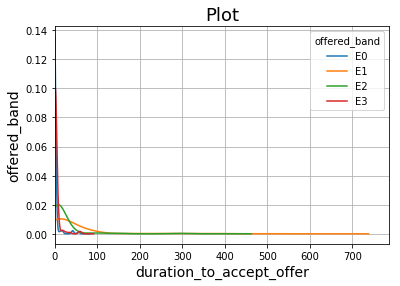

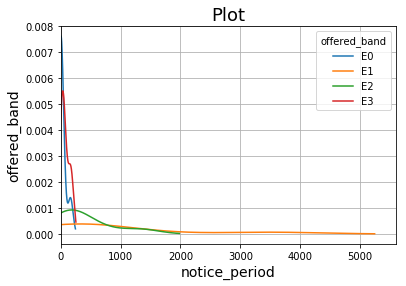

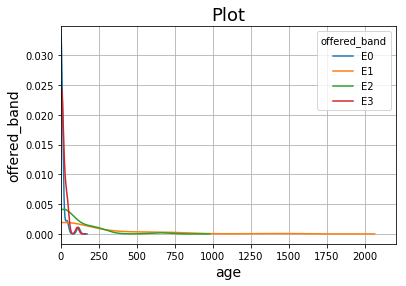

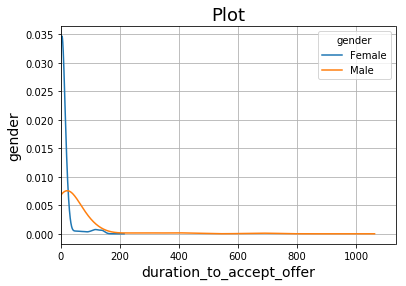

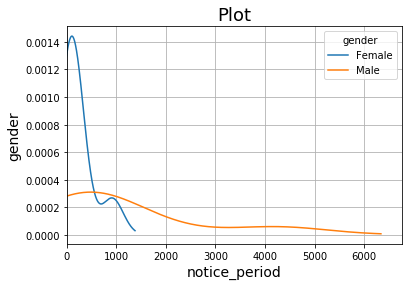

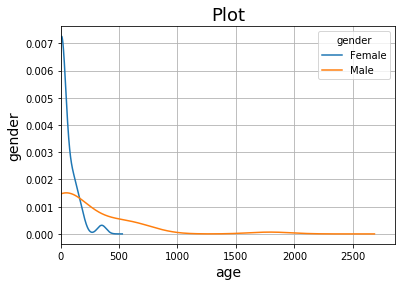

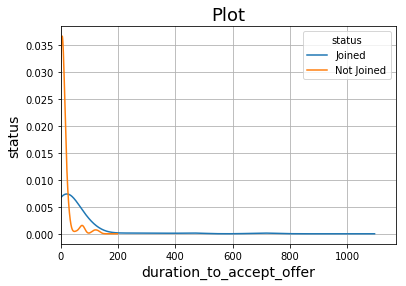

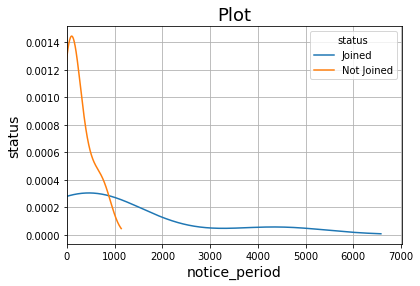

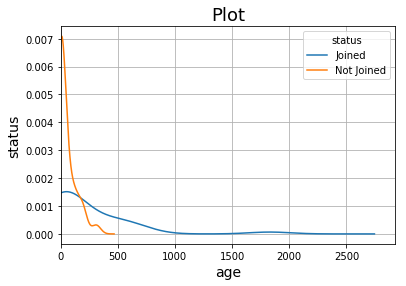

In [18]:
numerical_features_set = ['duration_to_accept_offer','notice_period','age']
categorical_features_set = ['offered_band','gender','status']

for c in categorical_features_set:
    for n in numerical_features_set:
        hist_plot(filter_df[n], filter_df[c], n,c)

### 4. Dummy Variable coding

Remove the response variable from the dataset¶


In [19]:
X_features = list(filter_df.columns)
X_features.remove('status')
X_features.remove('pecent_hike_expected_in_ctc')
X_features.remove('percent_hike_offered_in_ctc')
X_features.remove('candidate_relocate_actual')

In [20]:
X_features

['doj_extended',
 'duration_to_accept_offer',
 'notice_period',
 'offered_band',
 'percent_difference_ctc',
 'joining_bonus',
 'gender',
 'candidate_source',
 'rex_in_yrs',
 'lob',
 'location',
 'age']

In [21]:
categorical_features = ['doj_extended','offered_band','joining_bonus','gender','candidate_source','lob','location']

In [22]:
#for i in categorical_features:
 #   if filter_df.dtypes.name = 'category'
encoded_X_df = pd.get_dummies( filter_df[X_features], columns = categorical_features, drop_first = True )
encoded_Y_df = pd.get_dummies( filter_df['status'], drop_first=False)

In [23]:
encoded_Y_df.columns

Index(['Joined', 'Not Joined'], dtype='object')

In [24]:
#?pd.get_dummies

In [25]:
pd.options.display.max_columns = None
encoded_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 0 to 8994
Data columns (total 29 columns):
duration_to_accept_offer              8995 non-null int64
notice_period                         8995 non-null int64
percent_difference_ctc                8995 non-null float64
rex_in_yrs                            8995 non-null int64
age                                   8995 non-null int64
doj_extended_Yes                      8995 non-null uint8
offered_band_E1                       8995 non-null uint8
offered_band_E2                       8995 non-null uint8
offered_band_E3                       8995 non-null uint8
joining_bonus_Yes                     8995 non-null uint8
gender_Male                           8995 non-null uint8
candidate_source_Direct               8995 non-null uint8
candidate_source_Employee Referral    8995 non-null uint8
lob_BFSI                              8995 non-null uint8
lob_CSMP                              8995 non-null uint8
lob_ERS              

In [26]:
Y = encoded_Y_df.filter(['Joined'], axis =1)
X = encoded_X_df
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 0 to 8994
Data columns (total 1 columns):
Joined    8995 non-null uint8
dtypes: uint8(1)
memory usage: 79.1 KB


The train and test split can also be done using the **sklearn module**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)

## Model Building: Using the **sklearn** 



In [28]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
dt = tree.DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_split=100, min_samples_leaf=50)
dt_model = dt.fit(X_train,y_train)


In [29]:
#?tree.export_graphviz
#?graph.render()

In [42]:
import graphviz 


dot_data = tree.export_graphviz(dt_model,out_file=None,
                                feature_names=X_train.columns,  
                                class_names=['Not Joined','Joined'],  
                                filled=True, rounded=True,  
                                special_characters=True) 


graph = graphviz.Source(dot_data) 
#graph.render("hr_decision_tree") 
#graph.view
#graph

## Model Evaluation


### 1. The prediction on test data.

The prediction can be carried out by **defining functions** as well. Below is one such instance wherein a function is defined and is used for prediction

In [31]:
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual': test_class,
                               'predicted_value': dt_model.predict(test_data)})
    return y_pred_df

Giving label to the Y column of the test set by using the dictionary data type in python. This is being done for the model which was built using dummy variable coding. It will be used to generate confusion matrix at a later time

In [32]:
ser = y_test
status_dict = {1:"Joined", 0:"Not Joined"}
class_test_df = ser.replace(dict(Joined=status_dict))
class_test_df.rename({'Joined': 'status'}, axis='columns', inplace=True )
class_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1799 entries, 4622 to 8436
Data columns (total 1 columns):
status    1799 non-null object
dtypes: object(1)
memory usage: 28.1+ KB


In [33]:
dt_model_pred_test_df = pd.DataFrame(get_predictions(class_test_df.status, dt_model, X_test))
dt_model_pred_test_df.head()

,actual,predicted_value
4622,Joined,1
1530,Joined,1
8706,Joined,1
2233,Joined,1
676,Joined,1


In [34]:
dt_model_pred_test_df['predicted_class'] = dt_model_pred_test_df.predicted_value.map(lambda x: 'Joined' if x >= 1 else 'Not Joined')
dt_model_pred_test_df[0:10]


,actual,predicted_value,predicted_class
4622,Joined,1,Joined
1530,Joined,1,Joined
8706,Joined,1,Joined
2233,Joined,1,Joined
676,Joined,1,Joined
6778,Joined,1,Joined
2075,Not Joined,1,Joined
6998,Not Joined,1,Joined
8606,Not Joined,1,Joined
7375,Joined,1,Joined


### 3. Confusion Matrix

We will built classification matrix using the **metrics** method from **sklearn** package. We will also write a custom function to build a classification matrix and use it for reporting the performance measures.

#### 3a. Confusion Matrix using sklearn

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
print("The dt model with dummy variable coding output: ")
confusion_matrix(class_test_df.status, dt_model_pred_test_df.predicted_class)
dt_report = (classification_report(class_test_df, dt_model_pred_test_df.predicted_class))
print(dt_report)

The dt model with dummy variable coding output: 


array([[1441,   18],
       [ 331,    9]])

             precision    recall  f1-score   support

     Joined       0.81      0.99      0.89      1459
 Not Joined       0.33      0.03      0.05       340

avg / total       0.72      0.81      0.73      1799



#### 3b Confusion Matrix using generic function

In [37]:
def draw_cm( actual, predicted ):
    plt.figure(figsize=(9,9))
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["Joined", "Not Joined"] , 
               yticklabels = ["Joined", "Not Joined"],cmap = 'Blues_r')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Classification Matrix Plot', size = 15);
    plt.show()

The classification matrix plot as reported by **model 1**  with dummy variable coding is:

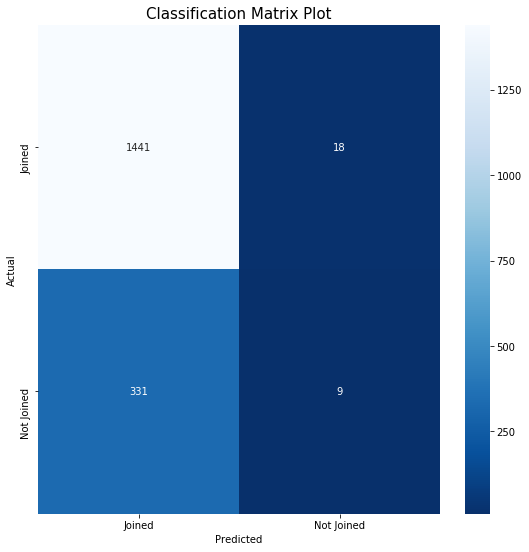

In [38]:
draw_cm( dt_model_pred_test_df.actual, dt_model_pred_test_df.predicted_class )

### 4. Performance Measure on the test set


In [39]:
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

In [40]:
cm = metrics.confusion_matrix(dt_model_pred_test_df.actual, dt_model_pred_test_df.predicted_class)

dt_model_metrics_df = pd.DataFrame(measure_performance(cm))
dt_model_metrics_df

,overall_acc,precision,recall,sensitivity,specificity
0,0.81,0.81,0.99,0.99,0.03


The F-score for the Decision Tree model is:

In [41]:
F_score = (2*0.81*0.99)/(0.81+0.99)
print(F_score)

0.891


*** 
End of Document
